In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


image = fits.open('../Lab_1/pretty_pics/lab1_pretty_pic_point_five_visible.00000001.FIT')

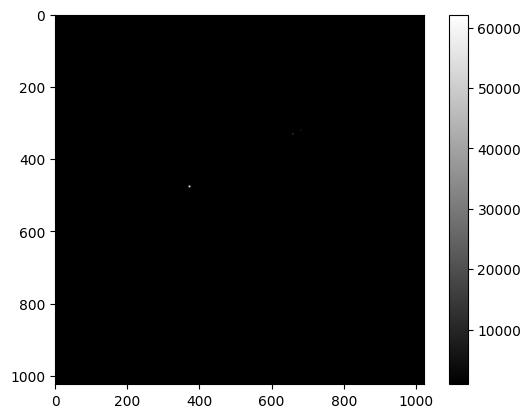

In [7]:
data = image[0].data

plt.imshow(data,cmap='gray')
plt.colorbar()

TypeError: Invalid shape (1024, 1024, 27) for image data

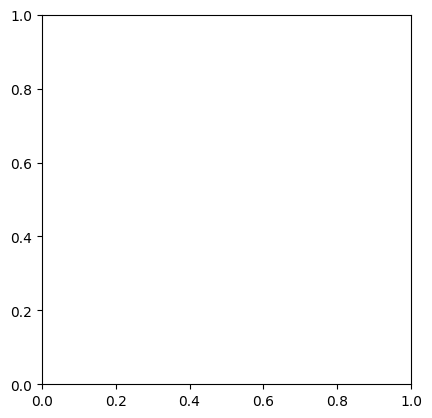

In [33]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Define the file paths for each channel
g_list = ["../Lab_1/pretty_pics/lab1_pretty_pic_point_five_visible.0000000{}.FIT".format(i) for i in range(9)]
i_list = ["../Lab_1/pretty_pics/lab1_pretty_pic_one_second_blue.0000000{}.FIT".format(i) for i in range(9)]
r_list = ["../Lab_1/pretty_pics/lab1_pretty_pic_point_three_red.0000000{}.FIT".format(i) for i in range(9)]

# Load image data for each channel
gdata = [fits.open(g)[0].data for g in g_list]
idata = [fits.open(i)[0].data for i in i_list]
rdata = [fits.open(r)[0].data for r in r_list]

# Stack the images along a new axis
gdata = np.stack(gdata, axis=-1)
idata = np.stack(idata, axis=-1)
rdata = np.stack(rdata, axis=-1)

g = gdata.astype('float64')
i = idata.astype('float64')
r = rdata.astype('float64')

# Create RGB image
rgb_default = make_lupton_rgb(i, r, g, stretch=0.5, Q=10)

# Display the RGB image
plt.imshow(rgb_default, origin='lower')
plt.colorbar()
plt.show()


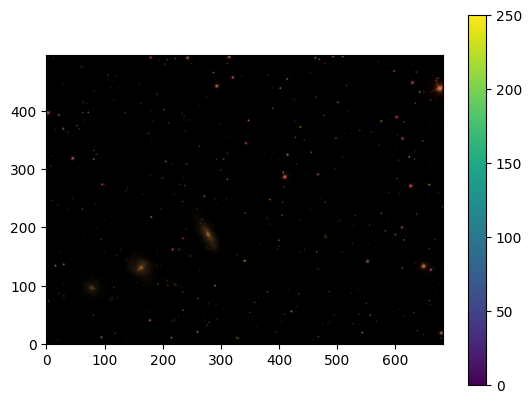

In [4]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# Read in the three images downloaded from here:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data

rgb_default = make_lupton_rgb(i, r, g)
plt.imshow(rgb_default, vmax = 250, origin='lower')
plt.colorbar()